# <span style="color: #FF6347;">1 | Introduction</span>

<div style="background-color: #FF6347; color: white; padding: 10px; border-radius: 15px;">

### 📘 1.1 | Rice Variety Classification and Quality Evaluation Using Image Analysis

</div>

<span style="color: black;">
Rice is one of the most globally significant grain crops, characterized by its genetic diversity that leads to numerous distinct varieties. Each variety differs in crucial features like texture, shape, and color. By harnessing these unique characteristics, we can classify and evaluate the quality of rice seeds with high accuracy.

This project leverages <span style="color: #FF6347; font-weight: bold;">Transfer Learning</span> with the <span style="color: #FF6347; font-weight: bold;">MobileNetV2</span> architecture in Keras to create a classification model for identifying five specific rice varieties: <span style="color: #FF6347; font-weight: bold;">Arborio, Basmati, Ipsala, Jasmine,</span> and <span style="color: #FF6347; font-weight: bold;">Karacadag</span>. Using a comprehensive dataset with <span style="color: #FF6347; font-weight: bold;">75,000 images</span> (15,000 for each variety), the model aims to classify rice types based on their visual features, providing insights valuable for seed selection and quality assessment.

By applying advanced <span style="color: #FF6347; font-weight: bold;">machine learning</span> and <span style="color: #FF6347; font-weight: bold;">deep neural networks</span>, this system aspires not only to enhance rice production and quality evaluation but also to support the broader fields of computer vision and pattern recognition. The findings here may serve as a foundation for automated classification and quality assessment across a range of agricultural products, contributing to innovations in agriculture and food quality control.

In summary, this Rice Variety Classification project demonstrates how image analysis can contribute to efficient rice classification and quality evaluation, benefiting agricultural practices and computer vision research in the food industry.
</span>


# <span style="color: #FF6347;">2 | Import Library</span>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
from matplotlib.patches import Rectangle
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# <span style="color: #FF6347;">3 | Generate a DataFrame for Image Files and Their Labels</span>

In [2]:
base_dir = '/kaggle/input/rice-image-dataset/Rice_Image_Dataset'

data = []

for class_name in os.listdir(base_dir):
    class_dir = os.path.join(base_dir, class_name)
    if os.path.isdir(class_dir):
        for img_file in os.listdir(class_dir):
            file_path = os.path.join(class_dir, img_file)
            data.append([file_path, class_name])

df = pd.DataFrame(data, columns=['Image', 'label'])

print(df.head())

                                               Image      label
0  /kaggle/input/rice-image-dataset/Rice_Image_Da...  Karacadag
1  /kaggle/input/rice-image-dataset/Rice_Image_Da...  Karacadag
2  /kaggle/input/rice-image-dataset/Rice_Image_Da...  Karacadag
3  /kaggle/input/rice-image-dataset/Rice_Image_Da...  Karacadag
4  /kaggle/input/rice-image-dataset/Rice_Image_Da...  Karacadag


In [3]:
df.head()

,Image,label
0,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Karacadag
1,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Karacadag
2,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Karacadag
3,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Karacadag
4,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Karacadag


# <span style="color: #FF6347;">4 | Visualization of Dataset</span>

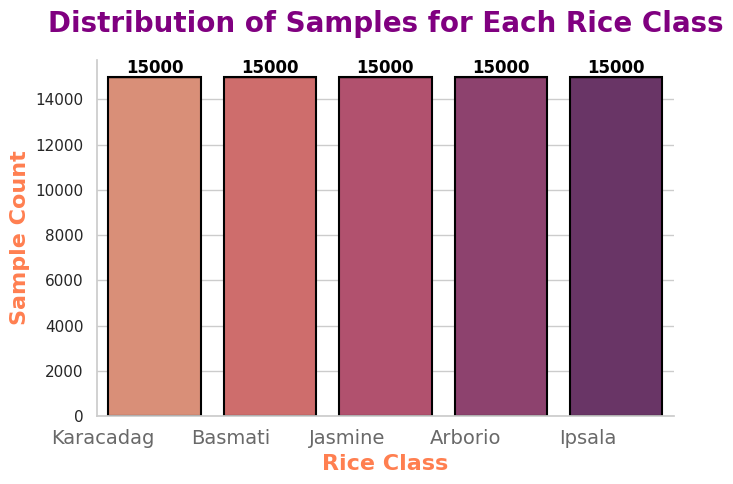

In [4]:
sns.set(style="whitegrid")
colors = sns.color_palette("flare", len(df['label'].unique())) 

plt.figure(figsize=(7, 5))
ax = sns.countplot(x='label', data=df, palette=colors, edgecolor="black", linewidth=1.5)

ax.set_title("Distribution of Samples for Each Rice Class", fontsize=20, weight='bold', color='purple', pad=20)
ax.set_xlabel("Rice Class", fontsize=16, weight='bold', color='coral')
ax.set_ylabel("Sample Count", fontsize=16, weight='bold', color='coral')

plt.xticks(ha='right', fontsize=14, color='dimgray')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black', weight='bold')

for p in ax.patches:
    ax.add_patch(plt.Rectangle((p.get_x(), p.get_height()), p.get_width(), 0.1, color='black'))

sns.despine()
plt.tight_layout()
plt.show()

In [5]:
class_names = df['label'].unique().tolist()
print("Class names:", class_names)

Class names: ['Karacadag', 'Basmati', 'Jasmine', 'Arborio', 'Ipsala']


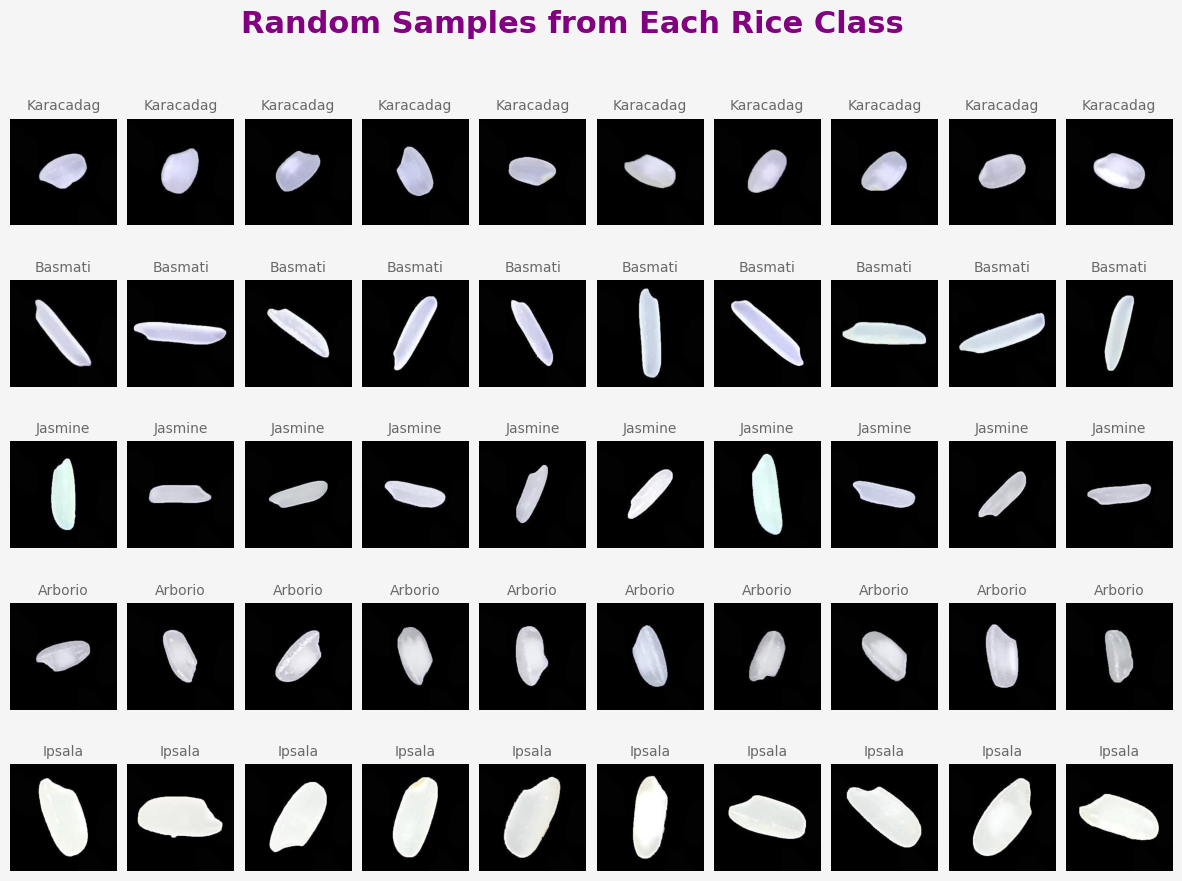

In [6]:
num_images_per_class = 10
num_classes = len(class_names)
plt.figure(figsize=(15, 10))
plt.gcf().set_facecolor('whitesmoke')
plt.suptitle("Random Samples from Each Rice Class", fontsize=22, fontweight='bold', color='purple')

for i, class_name in enumerate(class_names):
    # Randomly select 10 images from each class
    class_dir = f"{base_dir}/{class_name}"
    random_images = random.sample(os.listdir(class_dir), num_images_per_class)
    
    for j, img_name in enumerate(random_images):
        img_path = f"{class_dir}/{img_name}"
        
        img = plt.imread(img_path)
        ax = plt.subplot(num_classes, num_images_per_class, i * num_images_per_class + j + 1)
        ax.imshow(img)
        ax.set_title(class_name, fontsize=10, color='dimgray')
        ax.axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()

# <span style="color: #FF6347;">5 | Dividing the Dataset into Training and Testing Sets</span>

<div style="background-color: #FF7F50; color: white; padding: 10px; border-radius: 15px;">

### 📘 5.1 | Splitting Data and Preparing Image Generators with Data Augmentation

</div>

<span style="color: black;">
In this code, we start by splitting our data into training and testing sets, followed by some preprocessing to make our data ready for model training. Here's a step-by-step breakdown:

<span style="color: #FF7F50;">**1. Splitting the Data:**</span>

We split our dataset into training and testing sets using <span style="color: #FF7F50;">`train_test_split`</span>. This ensures that we have a separate subset of images to evaluate our model’s performance after training.

<span style="color: #FF7F50;">**2. Creating DataFrames for Training and Testing:**</span>

Using the training and testing splits, we create two new DataFrames, <span style="color: #FF7F50;">`df_train`</span> and <span style="color: #FF7F50;">`df_test`</span>, that store the image paths and corresponding labels for both sets.

<span style="color: #FF7F50;">**3. Encoding Labels:**</span>

Since our model requires numerical labels, we use <span style="color: #FF7F50;">`LabelEncoder`</span> to convert the text labels into numerical format.
These numerical labels are then transformed into strings because <span style="color: #FF7F50;">`ImageDataGenerator`</span> expects labels as strings when generating data for categorical classification.

<span style="color: #FF7F50;">**4. Setting Up ImageDataGenerator with Augmentation:**</span>

**Rotation, Shifting, Shearing, Zooming, and Flipping**: These augmentations help improve model robustness by generating slight variations of each image, essentially increasing the diversity of our dataset.
   - We also rescale each image's pixel values to the range [0, 1] by dividing by 255, which standardizes the images for model input.

<span style="color: #FF7F50;">**5. Creating Generators for Training and Testing:**</span>

With <span style="color: #FF7F50;">`flow_from_dataframe`</span>, we create <span style="color: #FF7F50;">`train_generator`</span> and <span style="color: #FF7F50;">`test_generator`</span> objects that feed batches of images from our DataFrames into the model.
   - These generators provide images in <span style="color: #FF7F50;">`batch_size`</span> chunks and continuously apply augmentations to the training data, ensuring that each training epoch sees slightly varied images.
   - The <span style="color: #FF7F50;">`class_mode='categorical'`</span> option enables multi-class classification, which is suitable for our project with multiple image categories.
</span>


In [7]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Image'], df['label'], test_size=0.2, random_state=42)

# Creating DataFrames for training and testing data
df_train = pd.DataFrame({'Image': X_train, 'label': y_train})
df_test = pd.DataFrame({'Image': X_test, 'label': y_test})

# Encoding the labels
encoder = LabelEncoder()
df_train['label'] = encoder.fit_transform(df_train['label'])
df_test['label'] = encoder.transform(df_test['label'])

# Converting labels to strings
df_train['label'] = df_train['label'].astype(str)
df_test['label'] = df_test['label'].astype(str)

# Setting up ImageDataGenerator with augmentation
image_size = (150, 150)
batch_size = 32
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalizing pixel values
    rotation_range=45,  # Randomly rotating images
    width_shift_range=0.2,  # Randomly shifting images horizontally
    height_shift_range=0.2,  # Randomly shifting images vertically
    shear_range=0.2,  # Shearing transformations
    zoom_range=0.2,  # Randomly zooming into images
    horizontal_flip=True,  # Randomly flipping images horizontally
    fill_mode='nearest'  # Filling new pixels with nearest pixel values
)

# Creating a generator for the training data
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='Image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Multi-class classification
    shuffle=True  # Shuffling the training data
)

# Creating a generator for the testing data
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='Image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Multi-class classification
    shuffle=False  # No shuffling for testing data
)

Found 60000 validated image filenames belonging to 5 classes.
Found 15000 validated image filenames belonging to 5 classes.


# <span style="color: #FF6347;">6 | Create Model (CNN)</span>

<div style="background-color: #FF6347; color: white; padding: 10px; border-radius: 15px;">

### 🛠 6.1 | Creating the Convolutional Neural Network (CNN) for Rice Classification

</div>

<span style="color: black;">
In this section, we will build a <span style="color: #FF6347; font-weight: bold;">Convolutional Neural Network (CNN)</span> to classify images of rice varieties effectively. Below, we outline the key steps in constructing the model:

1. **Convolution Layer**: The model begins with a convolutional layer consisting of <span style="color: #FF6347; font-weight: bold;">32 filters</span> and a <span style="color: #FF6347; font-weight: bold;">3x3 kernel size</span>, using the <span style="color: #FF6347; font-weight: bold;">ReLU</span> activation function to extract features from the input images (150x150x3).

2. **Pooling Layer**: To reduce the dimensionality and retain important features, we add a <span style="color: #FF6347; font-weight: bold;">Max Pooling</span> layer with a pool size of 2x2.

3. **Second Convolutional Layer**: To capture more complex features, a second convolutional layer with <span style="color: #FF6347; font-weight: bold;">64 filters</span> and a <span style="color: #FF6347; font-weight: bold;">3x3 kernel size</span> is added, followed by another max pooling layer.

4. **Flattening**: The output is flattened to convert the 2D matrices into a 1D vector, preparing it for the fully connected layer.

5. **Fully Connected Layer**: We add a dense layer with <span style="color: #FF6347; font-weight: bold;">128 units</span> and a <span style="color: #FF6347; font-weight: bold;">ReLU</span> activation function.

6. **Output Layer**: The final layer consists of <span style="color: #FF6347; font-weight: bold;">5 units</span> (representing each rice category) with a <span style="color: #FF6347; font-weight: bold;">softmax</span> activation function for multi-class classification.


In [8]:
cnn = tf.keras.models.Sequential()

# Step 1: Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(150, 150, 3)))

# Step 2: Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Step 3: Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 4: Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 5: Full connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 6: Output layer
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))  # تغییر تعداد خروجی‌ها بسته به تعداد کلاس‌ها

# Compile the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# نمایش خلاصه مدل برای بررسی معماری
cnn.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,997 (40.58 MB)

 Trainable params: 10,636,997 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

# <span style="color: #FF6347;">Model Architecture Analysis</span>

<span style="color: black;">

### Convolutional Layers (Conv2D):

**First Conv2D Layer (conv2d)**: Uses 32 filters with a kernel size of 3x3 and a ReLU activation function. The number of trainable parameters is 896.  
**Calculation**: (3 × 3 × input channels + 1) × 32.  
Assuming the input has 3 channels (e.g., RGB), the calculation becomes (3 × 3 × 3 + 1) × 32 = 896.

**Second Conv2D Layer (conv2d_1)**: Uses 64 filters with the same kernel size and ReLU activation. The number of trainable parameters is 18,496.  
**Calculation**: (3 × 3 × 32 + 1) × 64 = 18,496, where 32 is the number of channels from the previous layer.

### MaxPooling2D Layers:

The two max pooling layers, max_pooling2d and max_pooling2d_1, reduce the spatial dimensions of the input to prevent overfitting. These layers do not have trainable parameters.

### Flatten Layer:

The Flatten layer reshapes the multi-dimensional output into a 1D vector for the dense layers. This layer has no trainable parameters.

### Dense Layers:

**First Dense Layer**: Contains 128 neurons with a ReLU activation function and 10,616,968 trainable parameters.  
**Calculation**: (input units + 1) × 128.  
The input size is the flattened vector length (82,944 from the previous layer), so (82,944 + 1) × 128 = 10,616,968.

**Output Layer (dense_1)**: Has a number of neurons equal to the number of classes (5) and a softmax activation function. The number of trainable parameters is 645.  
**Calculation**: (128 + 1) × 5 = 645.

### Parameter Analysis:

- **Total params**: The total number of trainable parameters in the model is 10,636,997.
- **Trainable params**: All parameters are trainable, meaning 10,636,997 parameters.
- **Non-trainable params**: There are no non-trainable (fixed) parameters in this model.

### Conclusion:

This model architecture consists of two convolutional layers with max pooling, a flatten layer, and two dense layers, including an output layer. The high number of trainable parameters indicates that the model has significant learning capacity.

</span>
ble of effectively classifying complex image features.
</span>


# <span style="color: #FF6347;">7 | Training Model (CNN)</span>

<div style="background-color: #FF6347; color: white; padding: 10px; border-radius: 15px;">

### 🔄 7.1 | Training the Convolutional Neural Network (CNN)

</div>

<span style="color: black;">
In this section, we will train the previously built <span style="color: #FF6347; font-weight: bold;">Convolutional Neural Network (CNN)</span> using image data generators for training and validation. To enhance training performance and avoid overfitting, we implement <span style="color: #FF6347; font-weight: bold;">early stopping</span> as a callback. This ensures that training halts if the validation loss does not improve over a specified number of epochs (patience level).

### Key Points:
- **Early Stopping**: Monitors the <span style="color: #FF6347; font-weight: bold;">validation loss</span> and stops training when no improvement is detected after 3 epochs. The best weights are restored to avoid overfitting.
- **Training Process**: The model is trained for up to 20 epochs using the <span style="color: #FF6347; font-weight: bold;">train_generator</span> and validated with the <span style="color: #FF6347; font-weight: bold;">test_generator</span>.

The history object captures the training process, allowing us to analyze metrics like loss and accuracy after training completes.
</span>


In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

# Training the model with the callbacks
history = cnn.fit(
    train_generator,
    epochs=10,  
    validation_data=test_generator,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1731016848.780195      69 service.cc:145] XLA service 0x79552c005260 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731016848.780246      69 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1731016848.780250      69 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


   1/1875 ━━━━━━━━━━━━━━━━━━━━ 3:47:23 7s/step - accuracy: 0.2500 - loss: 1.6094

I0000 00:00:1731016852.366787      69 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.7557 - loss: 0.5964
Epoch 1: val_loss improved from inf to 0.17298, saving model to best_model.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 716s 378ms/step - accuracy: 0.7558 - loss: 0.5962 - val_accuracy: 0.9403 - val_loss: 0.1730
Epoch 2/10
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.9418 - loss: 0.1580
Epoch 2: val_loss improved from 0.17298 to 0.14708, saving model to best_model.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 449s 239ms/step - accuracy: 0.9418 - loss: 0.1580 - val_accuracy: 0.9447 - val_loss: 0.1471
Epoch 3/10
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.9592 - loss: 0.1155
Epoch 3: val_loss improved from 0.14708 to 0.06415, saving model to best_model.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 450s 239ms/step - accuracy: 0.9592 - loss: 0.1155 - val_accuracy: 0.9780 - val_loss: 0.0641
Epoch 4/10
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.9656 - loss: 0.0942
Epoch 4: val_loss did not impro

In [11]:
test_loss, test_accuracy = cnn.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

469/469 ━━━━━━━━━━━━━━━━━━━━ 89s 191ms/step - accuracy: 0.9845 - loss: 0.0437
Test Loss: 0.043979037553071976
Test Accuracy: 0.9837999939918518


469/469 ━━━━━━━━━━━━━━━━━━━━ 89s 189ms/step
              precision    recall  f1-score   support

     Arborio       0.97      0.98      0.98      2996
     Basmati       0.98      0.99      0.99      2995
      Ipsala       1.00      1.00      1.00      2929
     Jasmine       0.98      0.96      0.97      3083
   Karacadag       0.98      0.99      0.99      2997

    accuracy                           0.98     15000
   macro avg       0.98      0.98      0.98     15000
weighted avg       0.98      0.98      0.98     15000



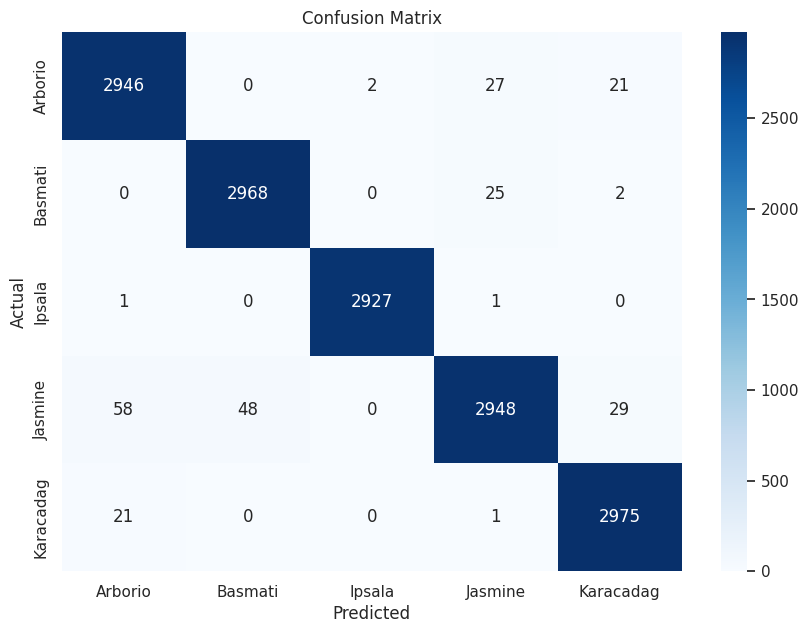

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred = cnn.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=encoder.classes_))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Analysis

<span style="color: #FF7F50;"><b>Confusion Matrix</b></spa  
Each column represents the predicted class, and each row represents the actual class. The values indicate the number of samples.

- Most predictions are correct, as the majority of values lie on the main diagonal.
- There are very few errors; for instance, the model confused Arborio with Jasmine and Karacadag, but these instances are very limited.

<span style="color: #FF7F50;"><b>Evaluation Metrics</b</span>:

- <span style="color: #FF7F50;"><b>Precision</b></span>, <span style="color: #FF7F50;"><b>Recall</b></span>, and <span style="color: #FF7F50;"><b>F1-Score</b></span> for each class are very high (close to 1.00), demonstrating strong performance in identifying each class.
- <span style="color: #FF7F50;"><b>Overall Accuracy</b></span> is 99%, indicating that the model has performed exceptionally well.

<span style="color: #FF7F50;"><b>Conclusion</b></span>:  
The model is highly accurate in identifying and classifying different types of rice, with minimal errors.


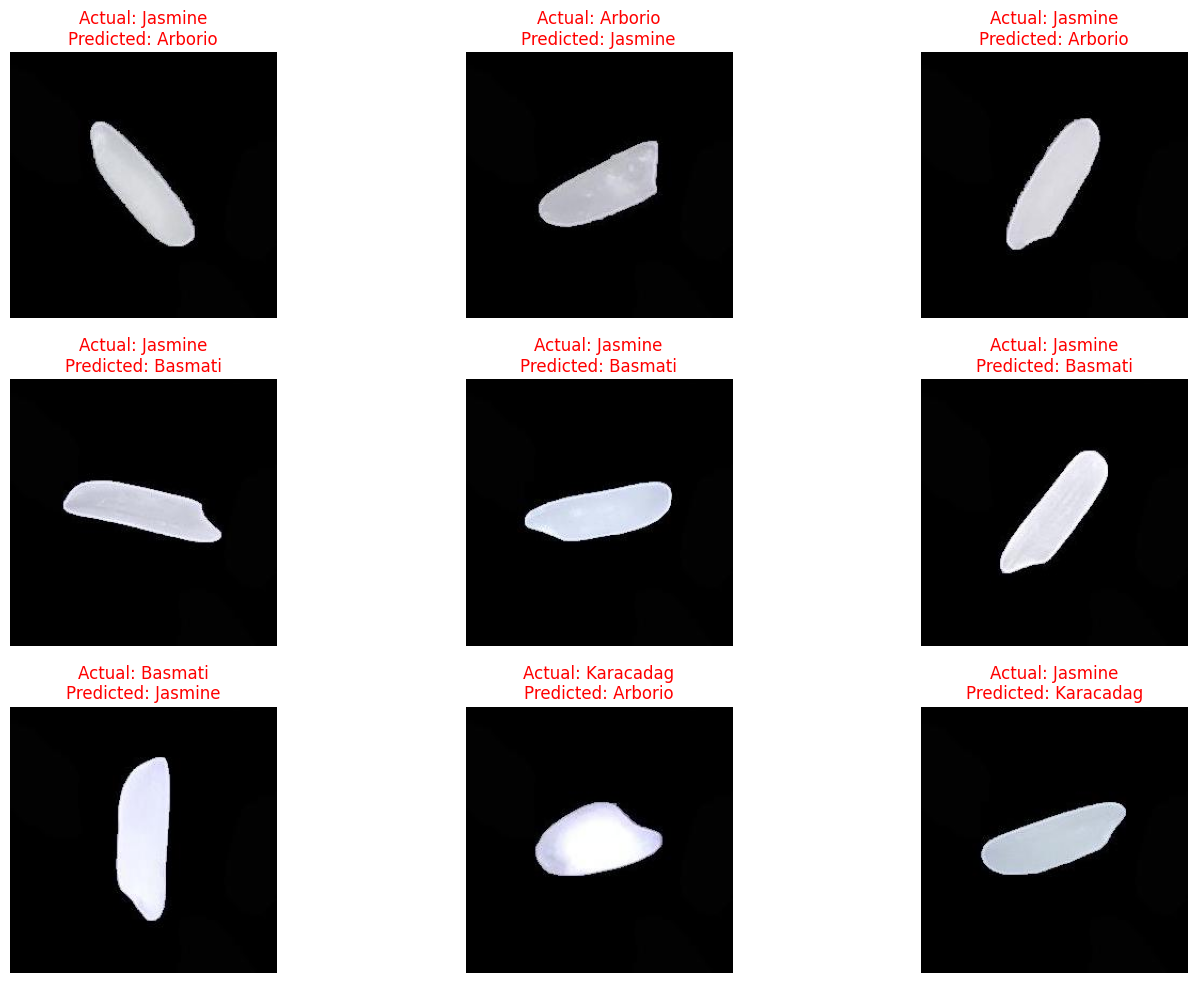

In [13]:
# Displaying Misclassified Images
errors = np.where(y_pred_classes != y_true)[0]

plt.figure(figsize=(15, 10))
for i, error in enumerate(errors[:9]):  # Displaying the first 9 mistakes
    plt.subplot(3, 3, i + 1)
    img_path = test_generator.filepaths[error]
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title(f"Actual: {encoder.classes_[y_true[error]]}\nPredicted: {encoder.classes_[y_pred_classes[error]]}",
              color='red' if y_true[error] != y_pred_classes[error] else 'green')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [14]:
# Printing the total number of misclassifications
total_errors = len(errors)
print(f"Total number of misclassified images: {total_errors}")

Total number of misclassified images: 236


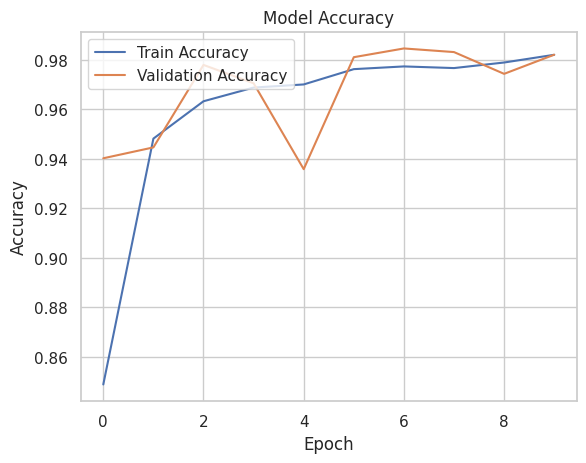

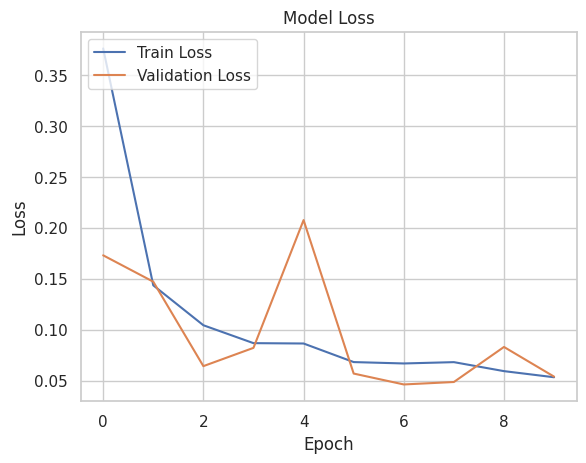

In [15]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


### <span style="color: #FF7F50;">Model Accuracy</span>
- The **train accuracy** (blue line) starts around 88% and quickly improves, reaching around 98% by the 5th epoch.
- **Validation accuracy** (orange line) also rises steadily, aligning closely with the training accuracy by the last epoch.
- The convergence between train and validation accuracy suggests that the model generalizes well without overfitting.

### <span style="color: #FF7F50;">Model Loss</span>
- The **train loss** (blue line) drops sharply in the first few epochs, stabilizing below 0.05 after the 5th epoch.
- **Validation loss** (orange line) follows a similar pattern, maintaining a low value with slight fluctuations toward the end.
- The low and stable loss values for both train and validation sets indicate the model has learned effectively and isn’t struggling with significant errors.

### <span style="color: #FF7F50;">Summary</span>
The plots indicate a well-trained model with high accuracy and low loss on both the training and validation sets, showing minimal overfitting and strong generalization.


In [16]:
# Save model architecture as JSON file
model_json = cnn.to_json()
with open("model_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Save model weights with correct filename
cnn.save_weights("model_weights.weights.h5")
print("Model and weights saved successfully.")

Model and weights saved successfully.


In [17]:
from keras.models import model_from_json

# Load model architecture
with open("model_architecture.json", "r") as json_file:
    loaded_model_json = json_file.read()

loaded_model = model_from_json(loaded_model_json)

# Load model weights
loaded_model.load_weights("model_weights.weights.h5")
print("Model loaded successfully.")

# Compile loaded model (necessary to prepare the model for prediction)
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model loaded successfully.


# <span style="color: #FF6347;">8 | Done </span>